# Student Details

***

**Name:** Hoai Nhan Nguyen <br>
**Student Number:** sba24098 <br>
**Course:** Higher Diploma in Science in Artificial Intelligence Applications

***

# **Assessment Task**

This assessment aims to evaluate your ability to apply project management methodology to evaluate and enhance the capstone project developed in semester one. You should be able to identify the strengths and weaknesses of the capstone project from semester one and make improvements based on additional knowledge. Additionally, machine learning results should improve based on understanding the dataset, which machine learning models are best used, and why. Improving the model’s performance with hyper-tuning parameters with an understanding of the performance metrics and dataset. Finally, validate the results and report on your findings.

The final report should build on from semester one and include your findings of machine learning implementation, results validation, model comparison, and any future recommendations. The report should be presented in a clear and concise manner, and it should demonstrate your ability to use a project management methodology.

The poster presentation should present your findings in a clear way for stakeholders.You are now required to present your findings and initial results with the aid of 3 elements: a poster presentation, report paper and artefact. You will create a maximum 5-minute presentation where you will include the following items. Remember that this is a guideline.

# **1. Data Understanding -  Exploratory Data Analysis**




**Importing libraries**

In [7]:
# Importing libraries for exploratory data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Loading Dataset**

In [5]:
# Reading the Customer Support Tickets - Ticket System - Helpdesk from https://www.kaggle.com/datasets/tobiasbueck/multilingual-customer-support-tickets/data
df = pd.read_csv('drive/MyDrive/Colab Notebooks/data/helpdesk_customer_tickets.csv')

**Inpecting Dataframe Structure**

In [ ]:
# Inpecting the shape of the dataframe.
df.shape

(4000, 17)

In [ ]:
# Inpecting the head of the dataframe
df.head(10)

,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,Problema crítico del servidor requiere atenció...,Es necesaria una investigación inmediata sobre...,Estamos investigando urgentemente el problema ...,Incident,Technical Support,high,es,IT Services,Urgent Issue,Service Disruption,Incident Report,Service Recovery,System Maintenance,NaN,NaN,NaN,NaN
1,Anfrage zur Verfügbarkeit des Dell XPS 13 9310,"Sehr geehrter Kundenservice,\n\nich hoffe, die...","Sehr geehrter <name>,\n\nvielen Dank, dass Sie...",Request,Customer Service,low,de,Tech Online Store,Sales Inquiry,Product Support,Customer Service,Order Issue,Returns and Exchanges,NaN,NaN,NaN,NaN
2,Erro na Autocompletação de Código do IntelliJ ...,"Prezado Suporte ao Cliente <name>,\n\nEstou es...","Prezado <name>,\n\nObrigado por entrar em cont...",Incident,Technical Support,high,pt,IT Services,Technical Support,Software Bug,Problem Resolution,Urgent Issue,IT Support,NaN,NaN,NaN,NaN
3,Urgent Assistance Required: AWS Service,"Dear IT Services Support Team, \n\nI am reachi...","Dear <name>,\n\nThank you for reaching out reg...",Request,IT Support,high,en,IT Services,IT Support,Urgent Issue,Service Notification,Cloud Services,Problem Resolution,Technical Guidance,Performance Tuning,NaN,NaN
4,Problème d'affichage de MacBook Air,Cher équipe de support du magasin en ligne Tec...,"Cher <name>,\n\nMerci de nous avoir contactés ...",Incident,Product Support,low,fr,Tech Online Store,Technical Support,Product Support,Hardware Failure,Service Recovery,Routine Request,NaN,NaN,NaN,NaN
5,Urgent: Issue with Zoom Screen Sharing Feature,"Dear Customer Support,\n\nI am experiencing a ...","Dear <name>,\n\nThank you for reaching out. We...",Incident,Technical Support,high,en,IT Services,Technical Support,Urgent Issue,Service Disruption,Problem Resolution,Software Bug,NaN,NaN,NaN,NaN
6,Discrepancia de facturación en Google Workspace,"Estimado equipo de soporte de TI,\n\nEstoy esc...","Estimado <name>,\n\nGracias por ponerte en con...",Incident,Billing and Payments,low,es,IT Services,Billing Issue,Account Assistance,Payment Processing,Customer Service,Problem Resolution,NaN,NaN,NaN,NaN
7,Service outage resolution requested for ongoin...,"Dear IT Services Customer Support,\n\nI am wri...","Dear <name>,\n\nThank you for reaching out to ...",Change,Service Outages and Maintenance,high,en,IT Services,Service Outage,IT Support,Problem Resolution,Technical Support,Service Recovery,System Maintenance,Performance Tuning,Urgent Issue,NaN
8,Surface Pro 7 Issue,"Dear Tech Online Store Support Team,\n\nI hope...","Dear <name>,\n\nThank you for reaching out to ...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,Product Support,Software Bug,Hardware Failure,Problem Resolution,Service Recovery,NaN,NaN,NaN
9,Problèmes de déploiement avec les ressources AWS,"Cher équipe de support client,\n\nJ'espère que...","Cher <name>,\n\nMerci de nous avoir contactés ...",Problem,IT Support,medium,fr,IT Services,Technical Support,Problem Resolution,Service Disruption,Software Bug,Technical Guidance,NaN,NaN,NaN,NaN


In [ ]:
# Inpecting the tail of the dataframe
df.tail(10)

,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
3990,Urgent Issue with AWS Deployment,"Dear IT Services Support Team, I am writing to...","Dear <name>,\n\nThank you for reaching out to ...",Incident,Technical Support,high,en,IT Services,Urgent Issue,Service Disruption,Incident Report,IT Support,Technical Support,Cloud Services,Performance Tuning,NaN,NaN
3991,Probleme mit dem Google Drive-Zugang,"Sehr geehrter Kundenservice, \n\nwir haben Pro...",Betreff: Re: Probleme mit dem Google Drive-Zug...,Incident,Human Resources,low,de,IT Services,IT Support,Service Disruption,Urgent Issue,Technical Guidance,Problem Resolution,General Inquiry,NaN,NaN,NaN
3992,Browser-Leistungsproblem,"Sehr geehrter Kundenservice,\n\nIch hoffe, die...","Sehr geehrter <name>,\n\nVielen Dank, dass Sie...",Incident,Technical Support,medium,de,Tech Online Store,Technical Support,Software Bug,Performance Tuning,Problem Resolution,Urgent Issue,NaN,NaN,NaN,NaN
3993,Assistance urgente requise : problème avec le ...,"Cher équipe de support client,\n\nJ'espère que...","Cher <name>,\n\nMerci de nous avoir contactés ...",Problem,Product Support,medium,fr,Tech Online Store,Technical Support,Product Support,Hardware Failure,Customer Service,Warranty Claim,Problem Resolution,Service Recovery,NaN,NaN
3994,Assistência Necessária para Problema de Tela d...,"Caro Time de Suporte ao Cliente, estou enfrent...","Caro <name>,\n\nObrigado por entrar em contato...",Incident,Product Support,medium,pt,Tech Online Store,Technical Support,Product Support,Software Bug,Hardware Failure,Problem Resolution,NaN,NaN,NaN,NaN
3995,Problem mit der HP DeskJet 3755 WLAN-Verbindung,"Sehr geehrter Tech Online Store Support, mein ...","Sehr geehrter <name>, bitte stellen Sie sicher...",Problem,Customer Service,low,de,Tech Online Store,Technical Support,Product Support,Hardware Failure,Network Issue,Problem Resolution,NaN,NaN,NaN,NaN
3996,Problemas com a impressora HP DeskJet 3755,"Olá Suporte ao Cliente,\n\nEstou escrevendo pa...",Assunto: Re: Problemas com a impressora HP Des...,Incident,Product Support,medium,pt,Tech Online Store,Technical Support,Printer Issues,Hardware Failure,Network Issue,Problem Resolution,Customer Service,NaN,NaN,NaN
3997,Problema urgente con el envío,"Estimado equipo de atención al cliente, me dir...","Estimado <name>,\n\nNos disculpamos por el ret...",Incident,Service Outages and Maintenance,high,es,Online Store,Shipping Delay,Customer Service,Order Issue,Urgent Issue,Problem Resolution,NaN,NaN,NaN,NaN
3998,NaN,"Cher Service Client, nous rencontrons des prob...","Cher <name>,\n\nMerci de nous avoir contactés ...",Incident,Technical Support,high,fr,IT Services,Technical Support,IT Support,Network Issue,Urgent Issue,Problem Resolution,Service Recovery,NaN,NaN,NaN
3999,Overcharge on yearly Microsoft Office 365 subs...,"Dear Tech Online Store Customer Support,\n\nI ...","Dear <name>,\n\nThank you for reaching out. We...",Problem,Billing and Payments,high,en,Tech Online Store,Billing Issue,Customer Service,Account Assistance,Problem Resolution,Payment Processing,NaN,NaN,NaN,NaN


In [ ]:
# Inpecting columns in the dataframe
df.columns

Index(['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language',
       'business_type', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6',
       'tag_7', 'tag_8', 'tag_9'],
      dtype='object')

In [ ]:
# Inpecting datatype in the dataframe
df.dtypes

,0
subject,object
body,object
answer,object
type,object
queue,object
priority,object
language,object
business_type,object
tag_1,object
tag_2,object


In [ ]:
# Inpecting unique values in the dataframe
df.nunique()

,0
subject,3533
body,3999
answer,4000
type,4
queue,10
priority,3
language,5
business_type,9
tag_1,42
tag_2,61


In [ ]:
# Inpecting missing values in the dataframe
df.isna().sum()

,0
subject,467
body,1
answer,0
type,0
queue,0
priority,0
language,0
business_type,0
tag_1,0
tag_2,0


In [ ]:
# Drop rows where 'subject' value is NaN
df = df.dropna(subset=['subject', 'body','tag_4'])

# Reset the index and drop the old index column
df.reset_index(drop=True, inplace=True)

In [ ]:
# Dropping the columns in the dataframe with missing values
df = df.drop(columns=['tag_5','tag_6', 'tag_7', 'tag_8', 'tag_9'])


In [ ]:
# Inspecting if there is any duplicate row.
df.duplicated().sum()

0

**4. Summarizing and inspecting Categorical Features**

In [ ]:
# Checking frequency distribution of the 'type' column
df['type'].value_counts()

,count
type,
Incident,1436
Request,965
Problem,754
Change,377


In [ ]:
# Checking frequency distribution of the 'queue' column
df['queue'].value_counts()

,count
queue,
Technical Support,1168
Product Support,614
Customer Service,552
IT Support,392
Billing and Payments,292
Returns and Exchanges,183
Service Outages and Maintenance,124
Sales and Pre-Sales,112
General Inquiry,50


In [ ]:
# Checking frequency distribution of the 'priority' column
df['priority'].value_counts()

,count
priority,
high,1444
medium,1429
low,659


In [ ]:
# Checking frequency distribution of the 'language' column
df['language'].value_counts()

,count
language,
en,1219
de,752
es,714
fr,428
pt,419


In [ ]:
# Checking frequency distribution of the 'business_type' column
df['business_type'].value_counts()

,count
business_type,
IT Services,1533
Tech Online Store,1267
IT Consulting Firm,357
Software Development Company,269
Online Store,90
IT Consulting Service,7
Pit Services,5
Adobe Photoshop 2024,2
_IT_Services_,2


In [ ]:
# Checking frequency distribution of the 'tag_1' column
df['tag_1'].value_counts()

,count
tag_1,
Technical Support,1862
Billing Issue,278
IT Support,271
Urgent Issue,253
Returns and Exchanges,173
Product Support,144
Network Issue,112
Service Outage,85
Customer Service,83


In [ ]:
# Checking frequency distribution of the 'tag_2' column
df['tag_2'].value_counts()

,count
tag_2,
Product Support,942
Technical Support,378
Urgent Issue,348
IT Support,314
Software Bug,278
Customer Service,266
Service Disruption,179
Network Issue,146
Hardware Failure,116


In [ ]:
# Checking frequency distribution of the 'tag_3' column
df['tag_3'].value_counts()

,count
tag_3,
Urgent Issue,369
Hardware Failure,331
Problem Resolution,317
Software Bug,311
Technical Support,265
...,...
Training Request,1
Employee Inquiry,1
Data Breach,1


In [ ]:
# Checking frequency distribution of the 'tag_4' column
df['tag_4'].value_counts()

,count
tag_4,
Problem Resolution,942
Urgent Issue,240
Technical Guidance,189
Technical Support,157
Product Support,146
...,...
Mobile Printing,1
Wi-Fi Setup,1
Help Request,1


In [ ]:
# Combining multiple tag columns into one string and sort the tags alphabetically
df['tags'] = df[['tag_1', 'tag_2', 'tag_3', 'tag_4']].apply(lambda row: ', '.join(sorted(row)), axis=1)

# Dropping the tag columns after combining them
df = df.drop(columns=['tag_1','tag_2', 'tag_3', 'tag_4'])

In [ ]:
# Describing a statistical summary of the dataframe
df.describe()

,subject,body,answer,type,queue,priority,language,business_type,tags
count,3532,3532,3532,3532,3532,3532,3532,3532,3532
unique,3532,3532,3532,4,10,3,5,9,799
top,Problema crítico del servidor requiere atenció...,Es necesaria una investigación inmediata sobre...,Estamos investigando urgentemente el problema ...,Incident,Technical Support,high,en,IT Services,"Hardware Failure, Problem Resolution, Product ..."
freq,1,1,1,1436,1168,1444,1219,1533,146


**5. Dataframe Visualization**

**Frequency Distribution of Ticket Types**

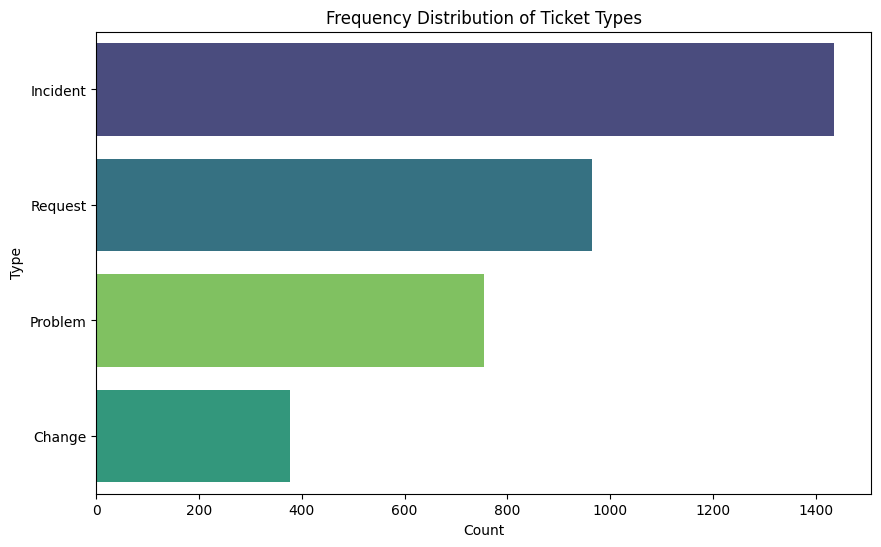

In [ ]:
# Defining the plot figure size
plt.figure(figsize=(10, 6))

# Getting the count of each ticket type
sns.countplot(data=df, y="type", hue="type", order=df["type"].value_counts().index, palette="viridis")

# Setting title, xlabel and ylabel
plt.title('Frequency Distribution of Ticket Types')
plt.xlabel('Count')
plt.ylabel('Type')

# Showing the plot based on the data
plt.show()

**Frequency Distribution of Ticket Business Type**

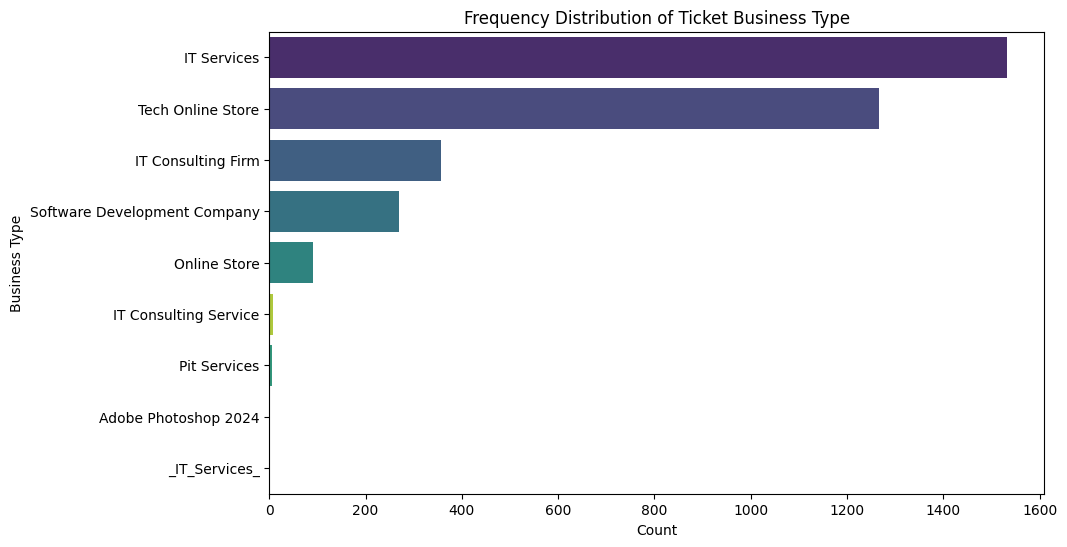

In [ ]:
# Defining the plot figure size
plt.figure(figsize=(10, 6))

# Getting the count of each ticket business type
sns.countplot(data=df, y="business_type", hue="business_type", order=df["business_type"].value_counts().index, palette="viridis")

# Setting title, xlabel and ylabel
plt.title('Frequency Distribution of Ticket Business Type')
plt.xlabel('Count')
plt.ylabel('Business Type')

# Showing the plot based on the data
plt.show()

**Frequency Distribution of Ticket Queue**

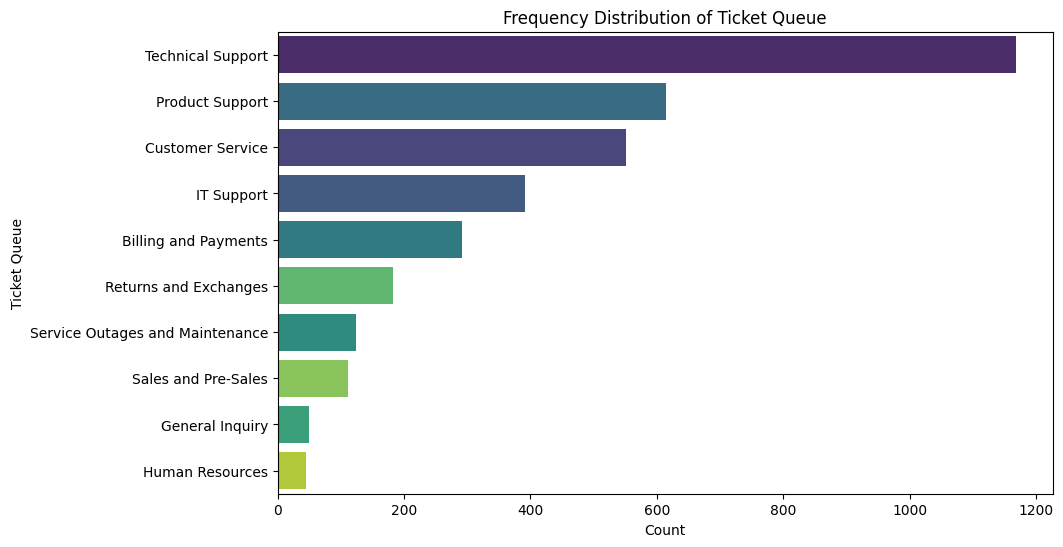

In [ ]:
# Defining the plot figure size
plt.figure(figsize=(10, 6))

# Getting the count of each ticket queue
sns.countplot(data=df, y="queue", hue="queue", order=df["queue"].value_counts().index, palette="viridis")

# Setting title, xlabel and ylabel
plt.title('Frequency Distribution of Ticket Queue')
plt.xlabel('Count')
plt.ylabel('Ticket Queue')

# Showing the plot based on the data
plt.show()

**Frequency Distribution of Ticket Priority**

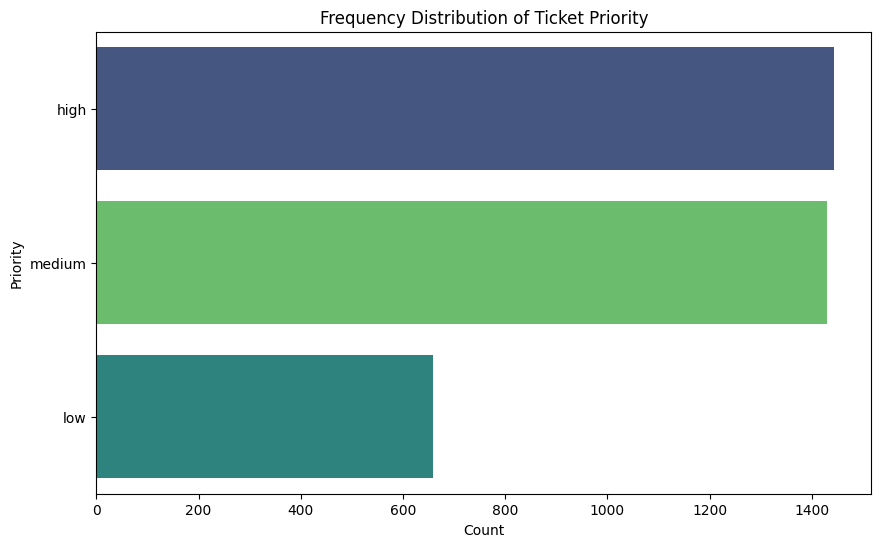

In [ ]:
# Defining the plot figure size
plt.figure(figsize=(10, 6))

# Getting the count of each ticket priority
sns.countplot(data=df, y="priority", hue="priority", order=df["priority"].value_counts().index, palette="viridis")

# Setting title, xlabel and ylabel
plt.title('Frequency Distribution of Ticket Priority')
plt.xlabel('Count')
plt.ylabel('Priority')

# Showing the plot based on the data
plt.show()

**Frequency Distribution of tickets based langauges**

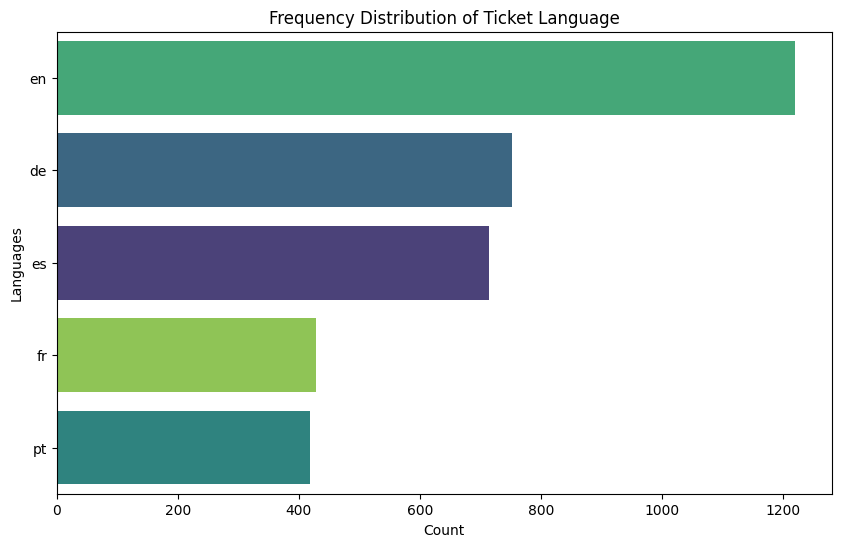

In [ ]:
# Defining the plot figure size
plt.figure(figsize=(10, 6))

# Getting the count of each ticket language
sns.countplot(data=df, y="language", hue="language", order=df["language"].value_counts().index, palette="viridis")

# Setting title, xlabel and ylabel
plt.title('Frequency Distribution of Ticket Language')
plt.xlabel('Count')
plt.ylabel('Languages')

# Showing the plot based on the data
plt.show()

**Tag Frequency Distribution in Tickets**

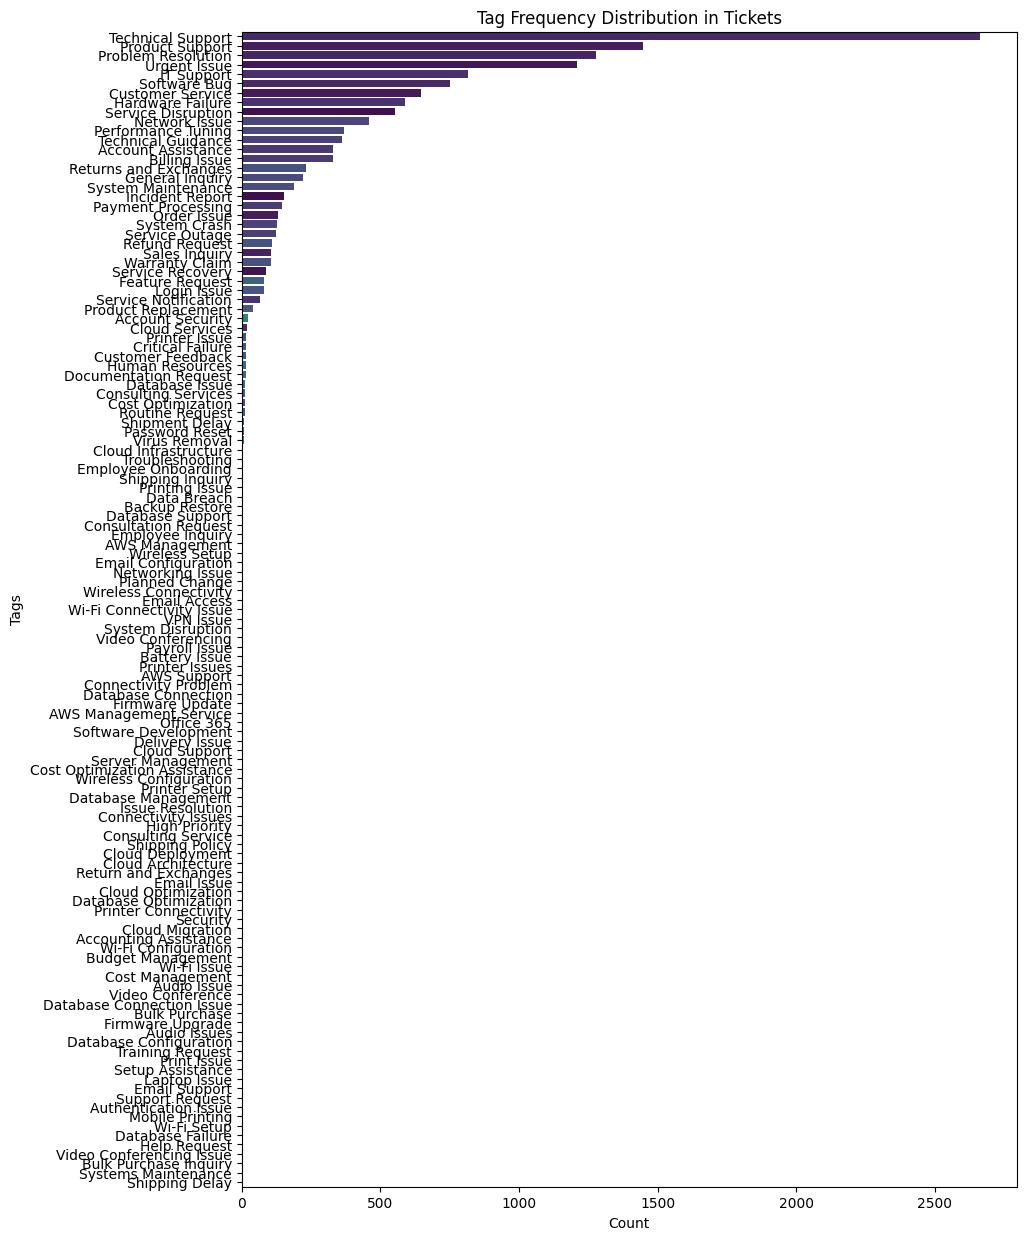

In [ ]:
# Defining the plot figure size
plt.figure(figsize=(10, 15))

# Creatimg the tags datatype as a list.
df['tags_split'] = df['tags'].str.split(', ')
# Explode tags into individual rows
exploded_df = df.explode('tags_split')

# Getting the count of each tag within tickets
sns.countplot(data=exploded_df, y='tags_split', hue='tags_split', order=exploded_df['tags_split'].value_counts().index, palette='viridis')

# Setting title, xlabel and ylabel
plt.title('Tag Frequency Distribution in Tickets')
plt.xlabel('Count')
plt.ylabel('Tags')

# Showing the plot based on the data
plt.show()

**Ticket Type Distribution Across Queues**

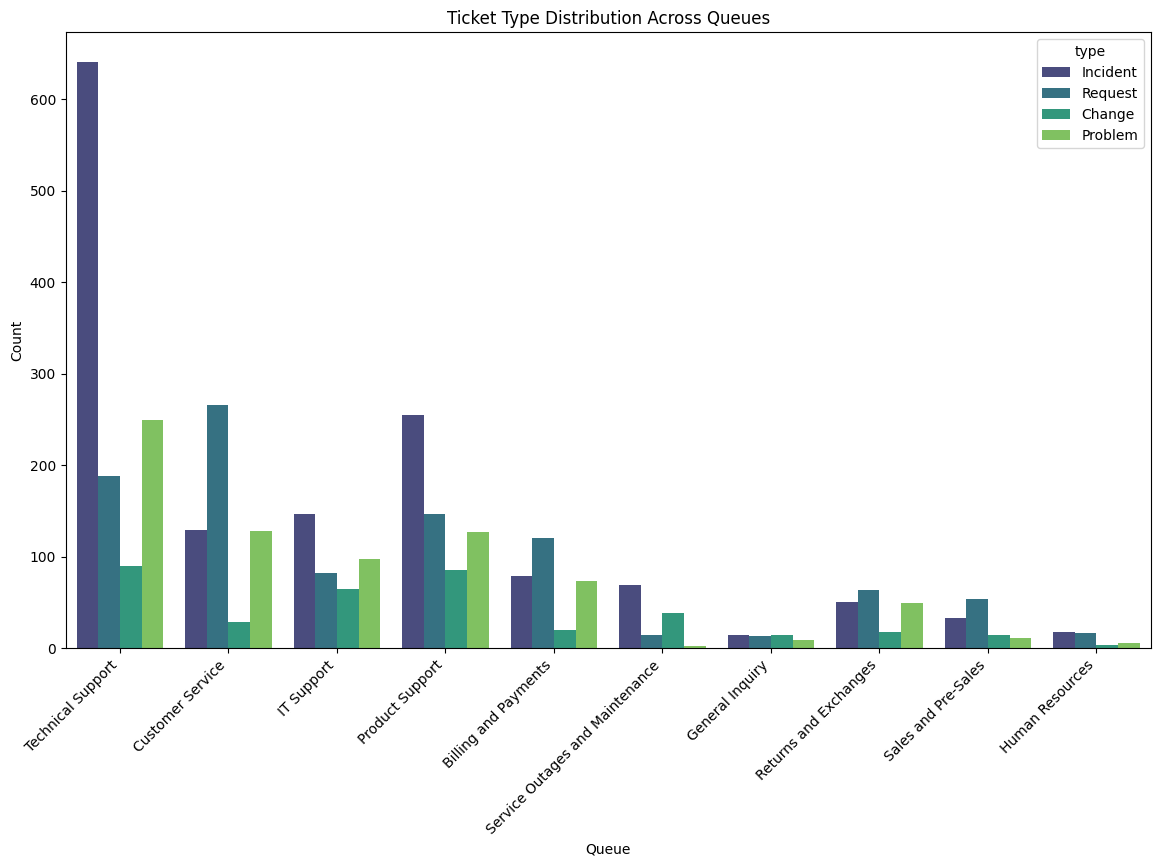

In [ ]:
# Defining the plot figure size
plt.figure(figsize=(14, 8))

# Getting the count of each ticket queue based on its ticket type
sns.countplot(data=df, x='queue', hue='type', palette="viridis")

# Setting title, xlabel and ylabel
plt.title('Ticket Type Distribution Across Queues')
plt.xlabel('Queue')
plt.ylabel('Count')

# Setting the text 45 degrees for the queues for readability
plt.xticks(rotation=45, ha='right')

# Showing the plot based on the data
plt.show()

**Priority Distribution Across Queues**

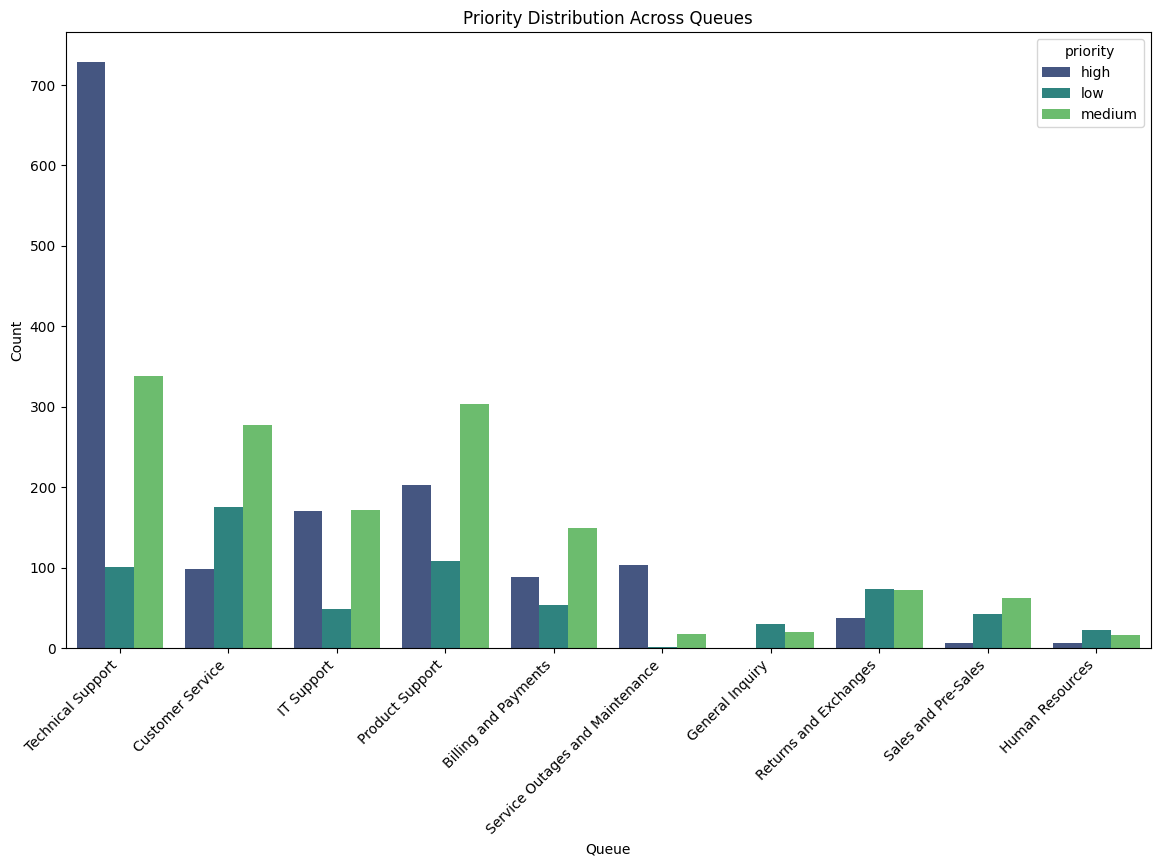

In [ ]:
# Defining the plot figure size
plt.figure(figsize=(14, 8))

# Getting the count of each ticket queue based on its priority
sns.countplot(data=df, x='queue', hue='priority', palette="viridis")

# Setting title, xlabel and ylabel
plt.title('Priority Distribution Across Queues')
plt.xlabel('Queue')
plt.ylabel('Count')

# Setting the text 45 degrees for the queues for readability
plt.xticks(rotation=45, ha='right')

# Showing the plot based on the data
plt.show()

**Ticket Language Distribution Across Queues**

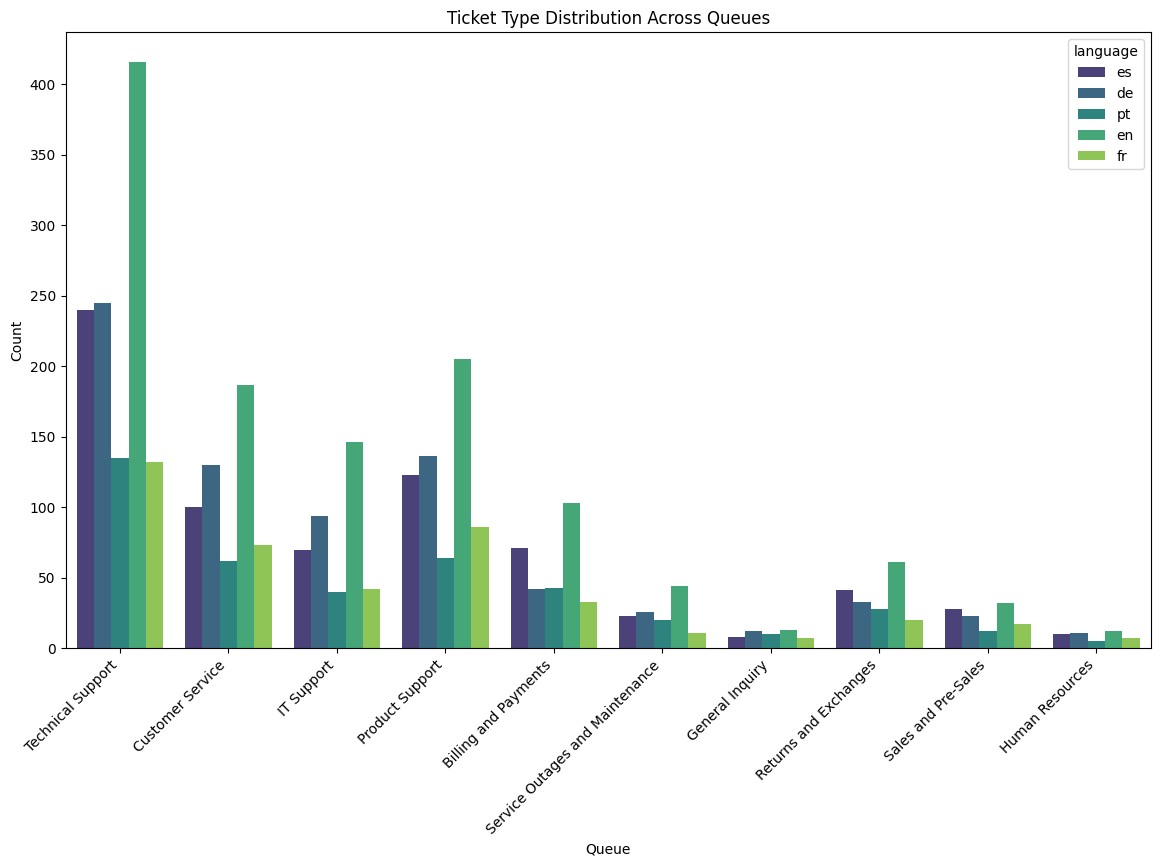

In [ ]:
# Defining the plot figure size
plt.figure(figsize=(14, 8))

# Getting the count of each ticket queue based on its language
sns.countplot(data=df, x='queue', hue='language', palette="viridis")

# Setting title, xlabel and ylabel
plt.title('Ticket Type Distribution Across Queues')
plt.xlabel('Queue')
plt.ylabel('Count')

# Setting the text 45 degrees for the queues for readability
plt.xticks(rotation=45, ha='right')

# Showing the plot based on the data
plt.show()

**Ticket Buiness Type Distribution Across Queues**

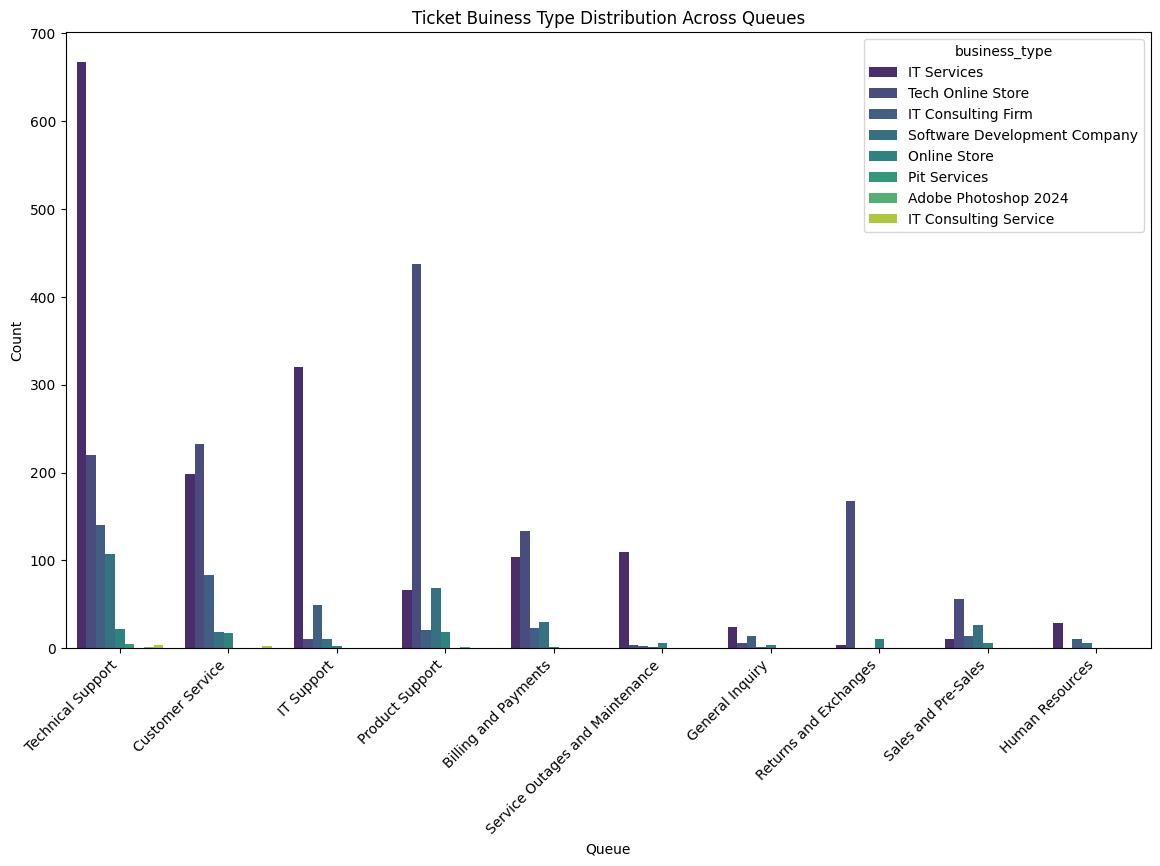

In [ ]:
# Defining the plot figure size
plt.figure(figsize=(14, 8))

# Getting the count of each ticket queue based on its language
sns.countplot(data=df, x='queue', hue='business_type', palette="viridis")

# Setting title, xlabel and ylabel
plt.title('Ticket Buiness Type Distribution Across Queues')
plt.xlabel('Queue')
plt.ylabel('Count')

# Setting the text 45 degrees for the queues for readability
plt.xticks(rotation=45, ha='right')

# Showing the plot based on the data
plt.show()

**Distrubution of subject and body length**

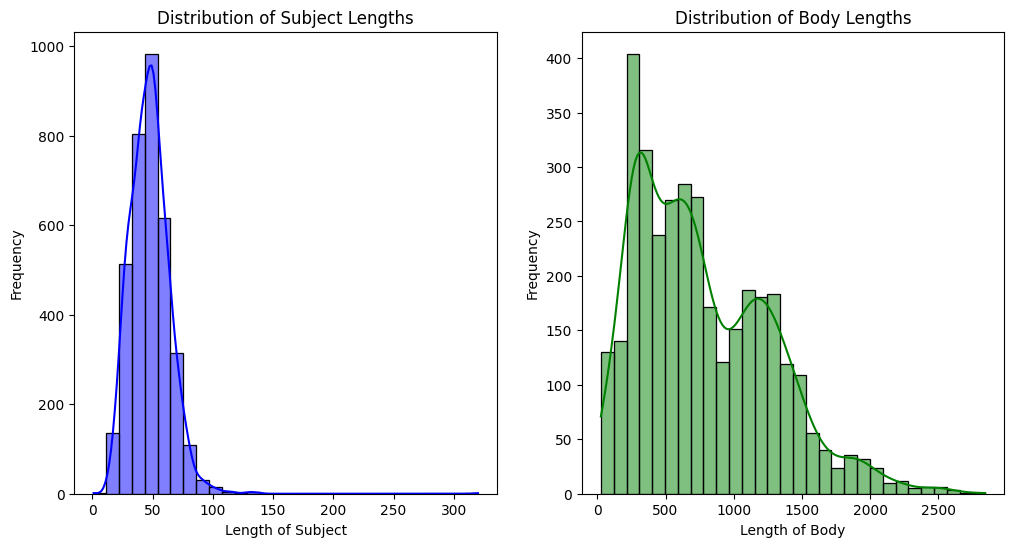

In [ ]:
# Calculate lengths for the subject and body
df['subject_length'] = df['subject'].apply(len)
df['body_length'] = df['body'].apply(len)

# Defining the plot figure size
plt.figure(figsize=(12, 6))

# Histogram for Subject Length
plt.subplot(1, 2, 1)
sns.histplot(df['subject_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Subject Lengths')
plt.xlabel('Length of Subject')
plt.ylabel('Frequency')

# Histogram for Body Length
plt.subplot(1, 2, 2)
sns.histplot(df['body_length'], bins=30, kde=True, color='green')
plt.title('Distribution of Body Lengths')
plt.xlabel('Length of Body')
plt.ylabel('Frequency')

# Showing the plot based on the data
plt.show()

#**2. Data Preparation - Data Cleaning and Feature Engineering**

**Defining the columns for the capstone project**

In [ ]:
# Provide the list of columns in the dataframe
df.columns

Index(['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language',
       'business_type', 'tags', 'tags_split', 'subject_length', 'body_length'],
      dtype='object')

In [ ]:
# Dropping the columns that is not required for the capstone project
df = df.drop(['answer','type','business_type','tags_split','subject_length', 'body_length', 'language'], axis=1)
df.columns

Index(['subject', 'body', 'queue', 'priority', 'tags'], dtype='object')

**Checking for any NaN or duplicate rows**

In [ ]:
# Count NaN and missing values in each column
df.isna().sum()

,0
subject,0
body,0
queue,0
priority,0
tags,0


In [ ]:
# Checking if there is any duplicate row.
df.loc[df.duplicated()]

,subject,body,queue,priority,tags


In [ ]:
# Checking if there is any empty strings for the subject feature
df.loc[df['subject'] == ' ']

,subject,body,queue,priority,tags
3191,,"Hello, I am creating a ticket to initiate a 'C...",Product Support,low,"Feature Request, Planned Change, Routine Reque..."


In [ ]:
# Dropping the rows that have an empty string for the subject feature
df.drop(df[df['subject'] == ' '].index, inplace=True)

In [ ]:
# Checking if there is any empty strings for the body feature
df.loc[df['body'] == ' ']

,subject,body,queue,priority,tags


**Removing queue types that won't be relevent for the capstone project**

In [ ]:
# Dropping the rows where the queue type is 'Returns and Exchanges', 'Human Resources','Service Outages and Maintenance','Sales and Pre-Sales' and, 'General Inquiry'
df = df[~df['queue'].isin(['Returns and Exchanges', 'Human Resources','Service Outages and Maintenance','Sales and Pre-Sales','General Inquiry'])]

# Checking frequency distribution of the 'queue' feature column
df['queue'].value_counts()

,count
queue,
Technical Support,1168
Product Support,613
Customer Service,552
IT Support,392
Billing and Payments,292


In [ ]:
# Reset the index
df = df.reset_index(drop=True)

**Translating the subject and body columns to English**



In [ ]:
from transformers import pipeline
from langdetect import detect
from bs4 import BeautifulSoup
import re

# Translation Model for Spanish, French, and Portuguese
translator_romance = pipeline(
    'translation',
    model='Helsinki-NLP/opus-mt-ROMANCE-en',
    max_length=1024,
    truncation=True
)

# Translation Model for German
translator_de = pipeline(
    'translation',
    model='Helsinki-NLP/opus-mt-de-en',
    max_length=1024,
    truncation=True
)

# Split text into chunks based on max tokens
def split_into_chunks(text, max_tokens, tokenizer):
    tokens = tokenizer.tokenize(text)
    chunks = [tokens[i:i + max_tokens] for i in range(0, len(tokens), max_tokens)]
    return [tokenizer.convert_tokens_to_string(chunk) for chunk in chunks]

# Function to detect language and translate
def translate_text_dynamic(text):
    if not isinstance(text, str):
        return text

    try:
        # Remove HTML tags in the text
        text = BeautifulSoup(text, "html.parser").get_text()

        # Remove escape sequences (newlines, tabs, etc.)
        text = re.sub(r'[\n\r\t\\\f\v]', ' ', text)

        # Detect language
        lang = detect(text)

        # Choosing the right model based on language
        if lang in ['es', 'fr', 'pt']:
            translator = translator_romance
        elif lang == 'de':
            translator = translator_de
        else:
            return text

        # Split into chunks
        tokenizer = translator.tokenizer
        chunks = split_into_chunks(text, max_tokens=512, tokenizer=tokenizer)

        # Translate each chunk and combine results
        translated_chunks = [translator(chunk)[0]['translation_text'] for chunk in chunks]

        return " ".join(translated_chunks)

    except Exception as e:
        print(f"Error processing text: {text[:200]}... with error: {e}")
        return f"Error: {e}"


Device set to use cpu
Device set to use cpu


In [ ]:
# Apply translation dynamically to subject
df['subject_translated'] = df['subject'].apply(translate_text_dynamic)

# Display the translated dataframe
df[['subject','subject_translated']]

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Apply translation dynamically to body
df['body_translated'] = df['body'].apply(translate_text_dynamic)

# Display the translated dataframe
df[['body','body_translated']]

This is a friendly reminder - the current text generation call will exceed the model's predefined maximum length (512). Depending on the model, you may observe exceptions, performance degradation, or nothing at all.


Error processing text: Caro Time de Suporte de Serviços de TI,  Estou entrando em contato para relatar um problema que estamos enfrentando com nosso Roteador Cisco ISR4331 na gestão das necessidades de rede empresarial. Nos... with error: index out of range in self
Error processing text: Estimado equipo de soporte al cliente de servicios de TI,  Espero que este mensaje los encuentre bien. Les escribo para llamar su atención urgente sobre un problema crítico que estamos experimentando ... with error: index out of range in self
Error processing text: Estimado equipo de Servicios de Consultoría de TI,  Espero que se encuentren bien. Me estoy comunicando en nombre de nuestra unidad en , ya que seguimos expresando nuestra inmensa gratitud por los exc... with error: index out of range in self
Error processing text: Sehr geehrtes IT-Services-Kundensupport-Team,  ich hoffe, diese Nachricht erreicht Sie wohl. Ich schreibe, um dringend eine umfassende Kostenanalyse zur Optimierung unserer AWS-Di

,body,body_translated
0,Es necesaria una investigación inmediata sobre...,Immediate investigation is needed into the int...
1,"Sehr geehrter Kundenservice,\n\nich hoffe, die...","Dear Customer Service, I hope this email will ..."
2,"Prezado Suporte ao Cliente <name>,\n\nEstou es...","Dear Customer Support, I am writing to bring t..."
3,"Dear IT Services Support Team, \n\nI am reachi...","Dear IT Services Support Team, I am reaching..."
4,Cher équipe de support du magasin en ligne Tec...,"Dear Tech online store support team, I am writ..."
...,...,...
3012,"Cher équipe de support client,\n\nJ'espère que...","Dear customer support team, I hope this messag..."
3013,"Caro Time de Suporte ao Cliente, estou enfrent...","Dear Customer Support Time, I'm facing a glitt..."
3014,"Sehr geehrter Tech Online Store Support, mein ...","Dear Tech Online Store Support, my HP DeskJet ..."
3015,"Olá Suporte ao Cliente,\n\nEstou escrevendo pa...","Hello Customer Support, I am writing to expres..."


In [ ]:
# Deleting the rows that throw an error processing text during the translation
df = df[~df['body_translated'].str.contains('Error: index out of range in self', case=False, na=False)]

# Reset the index
df = df.reset_index(drop=True)

In [ ]:
# Dropping the columns subject and body as I will be using the translated version.
df = df.drop(['subject','body'], axis=1)
df.columns

Index(['queue', 'priority', 'tags', 'body_translated', 'subject_translated'], dtype='object')

In [ ]:
# Rename columns subject_translated to subject and body_translated to body
df = df.rename(columns={'subject_translated': 'subject', 'body_translated': 'body'})
df.columns

Index(['queue', 'priority', 'tags', 'body', 'subject'], dtype='object')

In [ ]:
# Rearrange column order in the dataframe
column_order = ['queue', 'priority', 'subject','body', 'tags']
df = df[column_order]

In [ ]:
# Saving new dataframe as csv with main feature and target for the capstone project
df.to_csv('drive/MyDrive/Colab Notebooks/data/helpdesk_customer_tickets_translated.csv', index=False)

**Openning translated dataframe for capstone project**

In [6]:
# Reading the new dataframe of the customer support tickets
df = pd.read_csv('drive/MyDrive/Colab Notebooks/data/helpdesk_customer_tickets_translated.csv')

In [7]:
# Set option to display all columns
pd.set_option('display.max_columns', None)
# Showing full column text
pd.set_option('display.max_colwidth', None)
# Listing first 10 rows of the new dataframe of the customer support tickets
df.head(10)

,queue,priority,subject,body,tags
0,Technical Support,high,Critical server problem requires immediate attention,Immediate investigation is needed into the interruption in the AWS management service which is impacting essential business functions.,"Incident Report, Service Disruption, Service Recovery, Urgent Issue"
1,Customer Service,low,Request for availability of the Dell XPS 13 9310,"Dear Customer Service, I hope this email will reach you well. I'm writing to inquire about availability and delivery options for the Dell XPS 13 9310 Ultrabook. Could you please tell me if this model is currently in stock and the estimated delivery time to my location? I'm very interested in buying it as soon as possible. Thank you for your support. Sincerely,","Customer Service, Order Issue, Product Support, Sales Inquiry"
2,Technical Support,high,Error in IntelliJ Code Autocomplete IDEA,"Dear Customer Support, I am writing to bring to your attention a recurring problem with the self-completed code feature in IntelliJ IDEA 2024.1. This specific problem causes the application to stop frequently during development, which is significantly impairing my productivity. Every time I try to use the self-complete code feature, the software is left unanswered, eventually leading to a shutdown. I have already tried the common steps of troubleshooting, such as reinstalling and applying the latest updates, but the problem persists. I would appreciate your guidance on how to solve this problem as quickly as possible. Thank you for your attention.","Problem Resolution, Software Bug, Technical Support, Urgent Issue"
3,IT Support,high,Urgent Assistance Required: AWS Service,"Dear IT Services Support Team, I am reaching out regarding a high-priority ticket related to our AWS Management Service. We are experiencing significant challenges in deploying services and optimizing our cloud infrastructure costs. It is crucial for us to gain clarity and efficient solutions on this matter. We have been noticing higher-than-expected expenditure, and the deployment process appears to have several hurdles that prevent smooth operation. As this is affecting our operational efficiency and financial planning, your expert assistance is urgently requested. Could you please prioritize this ticket and guide us on the best practices to streamline deployment and manage costs effectively on AWS? Your prompt response will greatly aid in mitigating potential losses and optimizing current systems. Thank you for your immediate attention and expertise. Best regards,","Cloud Services, IT Support, Service Notification, Urgent Issue"
4,Product Support,low,MacBook Air Display Problem,"Dear Tech online store support team, I am writing to draw your attention to a problem that I have encountered with my recently purchased MacBook Air M1. Although the device has initially responded to my satisfaction, I have noticed that the screen sparks occasionally during use. This slight problem occurs sporadically and is somewhat distracting, especially when I focus on important tasks. I have checked that my operating system is up to date and I have not brought unauthorized alterations to the system configuration. Despite my troubleshooting attempts, such as the resetting of display settings and the assurance that all software is up to date, the sparking persists. Given the reputation of your brand for high quality devices, I am confident that this is a problem with which you can assist me. I would appreciate advice on possible solutions or if it would be possible to organize an inspection or replacement if necessary. My purchase was made in the name of the device. I can provide you with the next steps if necessary. Please provide the device.","Hardware Failure, Product Support, Service Recovery, Technical Support"
5,Technical Support,high,Urgent: Issue with Zoom Screen Sharing Feature,"Dear Customer Support, I am experiencing a high-priority incident wherein screen sharing fails during critical business webi

**Text Data Clearning**

In [2]:
# Importing library for text data cleaning
import nltk
import contractions
from textblob import TextBlob
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [4]:
# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# Function to correct spelling
def correct_spelling(text):
    # Ensure text is a string
    if isinstance(text, str):
        # Convert corrected TextBlob output to string
        return str(TextBlob(text).correct())
    return text

In [ ]:
# Standardizing categories to lowercase
df['queue'] = df['queue'].str.lower()
df['priority'] = df['priority'].str.lower()
df['tags'] = df['tags'].str.lower()
df['subject'] = df['subject'].str.lower()
df['body'] = df['body'].str.lower()

# Removing leading/trailing whitespace
df['tags'] = df['tags'].str.strip()
df['subject'] = df['subject'].str.strip()
df['body'] = df['body'].str.strip()

# Expanding common contractions
df['subject'] = df['subject'].apply(lambda x: contractions.fix(x))
df['body'] = df['body'].apply(lambda x: contractions.fix(x))

# Apply spell correction to the 'subject' and 'body' columns
df['subject'] = df['subject'].apply(correct_spelling)
df['body'] = df['body'].apply(correct_spelling)

# Removing URLs
df['subject'] = df['subject'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))
df['body'] = df['body'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))

# Remove email addresses
df['subject'] = df['subject'].apply(lambda x: re.sub(r'\S+@\S+', '', x))
df['body'] = df['body'].apply(lambda x: re.sub(r'\S+@\S+', '', x))

In [15]:
# Saving new dataframe as csv with main feature and target for the capstone project
df.to_csv('drive/MyDrive/Colab Notebooks/data/helpdesk_customer_tickets_translated_text_cleaned.csv', index=False)

**Feature Engineering**

In [5]:
# Reading the new dataframe of the customer support tickets
df = pd.read_csv('drive/MyDrive/Colab Notebooks/data/helpdesk_customer_tickets_translated_text_cleaned.csv')

In [6]:
df.head()

,queue,priority,subject,body,tags
0,technical support,high,critical server problem requires immediate att...,immediate investigation is needed into the int...,"incident report, service disruption, service r..."
1,customer service,low,request for availability of the well was 13 9310,"dear customer service, i hope this email will ...","customer service, order issue, product support..."
2,technical support,high,error in intellij code autocomplete idea,"dear customer support, i am writing to bring t...","problem resolution, software bug, technical su..."
3,it support,high,urgent assistance required: was service,"dear it services support team, i am reaching...","cloud services, it support, service notificati..."
4,product support,low,malbrook air display problem,"dear teach online store support team, i am wri...","hardware failure, product support, service rec..."


**Label Encoding for 'queue' and Custom Mapping for 'priority'**

In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
queue_encoder = LabelEncoder()

# Applying LabelEncoder to 'queue' columns
df['queue'] = queue_encoder.fit_transform(df['queue'])

# Manually map 'priority' column with custom order
priority_mapping = {'low': 0, 'medium': 1, 'high': 2}
df['priority'] = df['priority'].map(priority_mapping)

# Print Queue Mapping
print("\nQueue Label Mapping:")
for idx, label in enumerate(queue_encoder.classes_):
    print(f"{label} -> {idx}")

# Print Priority Mapping
print("\nPriority Label Mapping:")
for label, idx in priority_mapping.items():
    print(f"{label} -> {idx}")


Queue Label Mapping:
billing and payments -> 0
customer service -> 1
it support -> 2
product support -> 3
technical support -> 4

Priority Label Mapping:
low -> 0
medium -> 1
high -> 2


**NLP Tokenization - subject body and tags column**

In [8]:
# Tokenizing words for tags, subject and body
df['subject_word_tokenize'] = df['subject'].apply(nltk.word_tokenize)
df['body_word_tokenize'] = df['body'].apply(nltk.word_tokenize)
df['tags_word_tokenize'] = df['tags'].apply(nltk.word_tokenize)

# Tokenizing sentences for body
df['body_sentence_tokenize'] = df['body'].apply(nltk.sent_tokenize)

In [9]:
# Dropping tags, subject and body columns after tokenization
df = df.drop(['subject','body', 'tags'], axis=1)

In [10]:
# Removing stopwords in word tokenization
stop_words = set(stopwords.words('english'))
df['tags_word_tokenize'] = df['tags_word_tokenize'].apply(lambda words: [word for word in words if word not in stop_words])
df['subject_word_tokenize'] = df['subject_word_tokenize'].apply(lambda words: [word for word in words if word not in stop_words])
df['body_word_tokenize'] = df['body_word_tokenize'].apply(lambda words: [word for word in words if word not in stop_words])

In [11]:
# Removing punctuation in word tokenization
df['tags_word_tokenize'] = df['tags_word_tokenize'].apply(lambda words: [word for word in words if re.match(r'^\w+$', word)])
df['subject_word_tokenize'] = df['subject_word_tokenize'].apply(lambda words: [word for word in words if re.match(r'^\w+$', word)])
df['body_word_tokenize'] = df['body_word_tokenize'].apply(lambda words: [word for word in words if re.match(r'^\w+$', word)])

In [12]:
# Listing first 10 rows of the new dataframe of the customer support tickets
df.head(10)

,queue,priority,subject_word_tokenize,body_word_tokenize,tags_word_tokenize,body_sentence_tokenize
0,4,2,"[critical, server, problem, requires, immediat...","[immediate, investigation, needed, interruptio...","[incident, report, service, disruption, servic...",[immediate investigation is needed into the in...
1,1,0,"[request, availability, well, 13, 9310]","[dear, customer, service, hope, email, reach, ...","[customer, service, order, issue, product, sup...","[dear customer service, i hope this email will..."
2,4,2,"[error, intellij, code, autocomplete, idea]","[dear, customer, support, writing, bring, atte...","[problem, resolution, software, bug, technical...","[dear customer support, i am writing to bring ..."
3,2,2,"[urgent, assistance, required, service]","[dear, services, support, team, reaching, rega...","[cloud, services, support, service, notificati...","[dear it services support team, i am reachin..."
4,3,0,"[malbrook, air, display, problem]","[dear, teach, online, store, support, team, wr...","[hardware, failure, product, support, service,...","[dear teach online store support team, i am wr..."
5,4,2,"[urgent, issue, room, screen, sharing, feature]","[dear, customer, support, experiencing, incide...","[problem, resolution, service, disruption, tec...","[dear customer support, i am experiencing a h..."
6,0,0,"[filling, discrepancy, goose, workplace]","[dear, support, team, writing, report, incorre...","[account, assistance, billing, issue, customer...","[dear it support team, i am writing to report ..."
7,3,1,"[surface, pro, 7, issue]","[dear, teach, online, store, support, team, ho...","[hardware, failure, product, support, software...","[dear teach online store support team, i hope..."
8,2,1,"[employment, problems, resources]","[dear, customer, support, team, hope, message,...","[problem, resolution, service, disruption, sof...","[dear customer support team, i hope this messa..."
9,4,1,"[request, software, development, consultation,...","[dear, customer, support, hope, message, finds...","[support, problem, resolution, service, notifi...","[dear customer support, i hope this message f..."


**Stemming - subject_word_tokenize and tags_word_tokenize columns**

In [13]:
# Initialize the stemmer
stemmer = PorterStemmer()

# Function to stemming a list of words
def stem_words(words):
    return [stemmer.stem(word) for word in words]

# Applying stemming function to the subject_word_tokenize and tags_word_tokenize columns
df['subject_word_tokenize'] = df['subject_word_tokenize'].apply(stem_words)
df['tags_word_tokenize'] = df['tags_word_tokenize'].apply(stem_words)

**Lemmatization - body_word_tokenize**

In [14]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of words
def lemmatize_words(words):
    return [lemmatizer.lemmatize(word) for word in words]

# Applying lemmatize_words function to the body_word_tokenize column
df['body_word_tokenize'] = df['body_word_tokenize'].apply(lemmatize_words)


In [15]:
# Listing first 10 rows of the new dataframe of the customer support tickets
df.head(10)

,queue,priority,subject_word_tokenize,body_word_tokenize,tags_word_tokenize,body_sentence_tokenize
0,4,2,"[critic, server, problem, requir, immedi, attent]","[immediate, investigation, needed, interruptio...","[incid, report, servic, disrupt, servic, recov...",[immediate investigation is needed into the in...
1,1,0,"[request, avail, well, 13, 9310]","[dear, customer, service, hope, email, reach, ...","[custom, servic, order, issu, product, support...","[dear customer service, i hope this email will..."
2,4,2,"[error, intellij, code, autocomplet, idea]","[dear, customer, support, writing, bring, atte...","[problem, resolut, softwar, bug, technic, supp...","[dear customer support, i am writing to bring ..."
3,2,2,"[urgent, assist, requir, servic]","[dear, service, support, team, reaching, regar...","[cloud, servic, support, servic, notif, urgent...","[dear it services support team, i am reachin..."
4,3,0,"[malbrook, air, display, problem]","[dear, teach, online, store, support, team, wr...","[hardwar, failur, product, support, servic, re...","[dear teach online store support team, i am wr..."
5,4,2,"[urgent, issu, room, screen, share, featur]","[dear, customer, support, experiencing, incide...","[problem, resolut, servic, disrupt, technic, s...","[dear customer support, i am experiencing a h..."
6,0,0,"[fill, discrep, goos, workplac]","[dear, support, team, writing, report, incorre...","[account, assist, bill, issu, custom, servic, ...","[dear it support team, i am writing to report ..."
7,3,1,"[surfac, pro, 7, issu]","[dear, teach, online, store, support, team, ho...","[hardwar, failur, product, support, softwar, b...","[dear teach online store support team, i hope..."
8,2,1,"[employ, problem, resourc]","[dear, customer, support, team, hope, message,...","[problem, resolut, servic, disrupt, softwar, b...","[dear customer support team, i hope this messa..."
9,4,1,"[request, softwar, develop, consult, server, a...","[dear, customer, support, hope, message, find,...","[support, problem, resolut, servic, notif, tec...","[dear customer support, i hope this message f..."


**Bag of Words - tags column**

In [16]:
# Importing library to apply bag of words method
from sklearn.feature_extraction.text import CountVectorizer

# Converting the token lists into strings for CountVectorizer
df['tags_string'] = df['tags_word_tokenize'].apply(lambda x: ' '.join(x))

# Creating a CountVectorizer instance
bow_vectorizer = CountVectorizer()
# Applying the CountVectorizer to the tags_string
bow_matrix = bow_vectorizer.fit_transform(df['tags_string'])

# Convert bow_matrix matrix to a DataFrame
tags_bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())
tags_bow_df = tags_bow_df.add_prefix('tags_')

# Display the tags_bow_df DataFrame
tags_bow_df

,tags_365,tags_access,tags_account,tags_architectur,tags_assist,tags_audio,tags_authent,tags_aw,tags_backup,tags_batteri,...,tags_technic,tags_troubleshoot,tags_tune,tags_updat,tags_urgent,tags_video,tags_viru,tags_vpn,tags_warranti,tags_wireless
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3007,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3008,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3009,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


**TF-IDF - subject and body column**

In [17]:
# Importing library to apply TF-IDF method
from sklearn.feature_extraction.text import TfidfVectorizer

# Converting the subject word lists into strings for TfidfVectorizer
df['subject_string'] = df['subject_word_tokenize'].apply(lambda x: ' '.join(x))

# Creating a TfidfVectorizer instance
subject_vectorizer = TfidfVectorizer()
# Applying the TfidfVectorizer to the subject_string
subject_tfidf = subject_vectorizer.fit_transform(df['subject_string'])

# Convert TF-IDF matrices to DataFrames
subject_tfidf_df = pd.DataFrame(subject_tfidf.toarray(), columns=subject_vectorizer.get_feature_names_out())
subject_tfidf_df = subject_tfidf_df.add_prefix('subject_')

# Display the subject_tfidf_df DataFrame
subject_tfidf_df


,subject_11,subject_13,subject_2021,subject_2023,subject_2024,subject_365,subject_3755,subject_403,subject_502,subject_504,...,subject_weimar,subject_well,subject_wife,subject_window,subject_word,subject_work,subject_workflow,subject_workplac,subject_wrong,subject_yearli
0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.372237,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.368262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3007,0.0,0.389191,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.385034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3008,0.0,0.000000,0.0,0.0,0.0,0.000000,0.454069,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3009,0.0,0.000000,0.0,0.0,0.0,0.000000,0.571675,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [18]:
# Converting the body word lists into strings for TfidfVectorizer
df['body_string'] = df['body_word_tokenize'].apply(lambda x: ' '.join(x))

# Creating a TfidfVectorizer instance
body_vectorizer = TfidfVectorizer()
# Applying the TfidfVectorizer to the body_string
body_tfidf = body_vectorizer.fit_transform(df['body_string'])

# Convert TF-IDF matrices to DataFrames
body_tfidf_df = pd.DataFrame(body_tfidf.toarray(), columns=body_vectorizer.get_feature_names_out())
body_tfidf_df = body_tfidf_df.add_prefix('body_')

# Display the subject_tfidf_df DataFrame
body_tfidf_df

,body_0x80300024,body_10,body_11,body_12,body_13,body_15,body_18,body_2021,body_2023,body_2024,...,body_written,body_wrong,body_wrongly,body_year,body_yearly,body_yesterday,body_yet,body_yield,body_yielded,body_youngest
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.147819,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3007,0.0,0.0,0.0,0.0,0.192384,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3008,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3009,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [19]:
# Combining numeric features into the DataFrame
df_transformed_numeric = pd.concat([df, tags_bow_df, subject_tfidf_df, body_tfidf_df], axis=1)

**Creating the Dataframe based on the machine learning implementation**

In [20]:
# Queue Classification DataFrame
# Dropping 'priority','tags_string','tags_word_tokenize','subject_string','subject_word_tokenize','body_string', 'body_word_tokenize' and 'body_sentence_tokenize'columns
df_queue_classification = df_transformed_numeric.drop(columns=['priority','tags_string','tags_word_tokenize', 'subject_string','subject_word_tokenize','body_string', 'body_word_tokenize','body_sentence_tokenize'])

In [21]:
df_queue_classification

,queue,tags_365,tags_access,tags_account,tags_architectur,tags_assist,tags_audio,tags_authent,tags_aw,tags_backup,...,body_written,body_wrong,body_wrongly,body_year,body_yearly,body_yesterday,body_yet,body_yield,body_yielded,body_youngest
0,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3007,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3008,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3009,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [22]:
# Saving new numeric dataframe as csv for the queue classification for the capstone project
df_queue_classification.to_csv('drive/MyDrive/Colab Notebooks/data/queue_classification_numeric_dataset.csv', index=False)

In [23]:
# Priority Classification DataFrame
# Dropping 'queue','tags_string','tags_word_tokenize','subject_string','subject_word_tokenize','body_string', 'body_word_tokenize' and 'body_sentence_tokenize'columns
df_priority_classification = df_transformed_numeric.drop(columns=['queue','tags_string','tags_word_tokenize', 'subject_string','subject_word_tokenize','body_string', 'body_word_tokenize','body_sentence_tokenize'])

In [24]:
df_priority_classification

,priority,tags_365,tags_access,tags_account,tags_architectur,tags_assist,tags_audio,tags_authent,tags_aw,tags_backup,...,body_written,body_wrong,body_wrongly,body_year,body_yearly,body_yesterday,body_yet,body_yield,body_yielded,body_youngest
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3007,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3008,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3009,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [25]:
# Saving new numeric dataframe as csv for the priority classification for the capstone project
df_priority_classification.to_csv('drive/MyDrive/Colab Notebooks/data/priority_classification_numeric_dataset.csv', index=False)

In [26]:
# Text Summarization DataFrame
# Selecting only the 'body_sentence_tokenize'column
df_text_summarization = df['body_sentence_tokenize']

In [27]:
df_text_summarization

,body_sentence_tokenize
0,[immediate investigation is needed into the in...
1,"[dear customer service, i hope this email will..."
2,"[dear customer support, i am writing to bring ..."
3,"[dear it services support team, i am reachin..."
4,"[dear teach online store support team, i am wr..."
...,...
3006,"[dear customer support team, i hope this messa..."
3007,"[dear customer support time, i am facing a gli..."
3008,"[dear teach online store support, my he desere..."
3009,"[hello customer support, i am writing to expre..."


In [28]:
# Saving new numeric dataframe as csv for the summarization functionality for the capstone project
df_text_summarization.to_csv('drive/MyDrive/Colab Notebooks/data/summarization_text_dataset.csv', index=False)

**Balancing the dataframe for classification**

**Importing Library for balancing dataframe**

In [5]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

**Balancing the target variable queue for classification**

<ipython-input-10-11290b5c3f93>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(queue_labels)


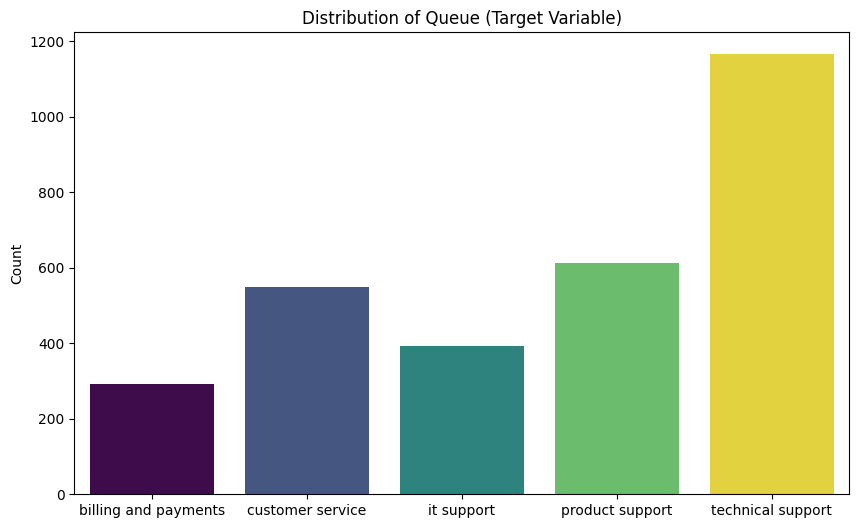

In [10]:
# Reading the dataset for queue classification.
df_queue_classification = pd.read_csv('drive/MyDrive/Colab Notebooks/data/queue_classification_numeric_dataset.csv')

# Queue labels for the bars
queue_labels = ['billing and payments', 'customer service', 'it support', 'product support', 'technical support']

# Count the occurrences of each queue value
target_counts = df_queue_classification['queue'].value_counts()

# Plot a bar chart based on target count
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=target_counts.index, y=target_counts.values, hue=target_counts.index, palette='viridis', legend=False)

# Change the x-axis tick labels
ax.set_xticklabels(queue_labels)

# Add labels and title
plt.title('Distribution of Queue (Target Variable)')
plt.xlabel('')
plt.ylabel('Count')

# Display the plot
plt.show()

In [11]:
# Split features and target variable
X = df_queue_classification.drop('queue', axis=1)
y = df_queue_classification['queue']

# Checking the shape
X.shape,y.shape

((3011, 4505), (3011,))

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2408, 4505), (603, 4505), (2408,), (603,))

In [13]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_queue_resampled, y_train_queue_resampled = smote.fit_resample(X_train, y_train)

<ipython-input-14-e94574840305>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(queue_labels)


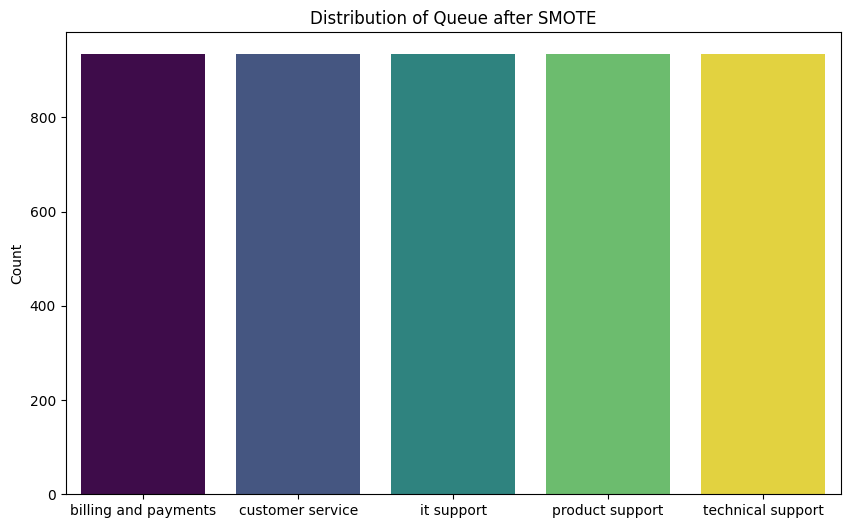

In [14]:
# Queue labels for the bars
queue_labels = ['billing and payments', 'customer service', 'it support', 'product support', 'technical support']

# Plot a bar chart based on target count after SMOTE
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=y_train_queue_resampled,hue=y_train_queue_resampled, palette='viridis', legend=False)

# Change the x-axis tick labels
ax.set_xticklabels(queue_labels)

# Add labels and title
plt.title('Distribution of Queue after SMOTE')
plt.xlabel('')
plt.ylabel('Count')

# Display the plot
plt.show()

**Balancing the target variable priority for classification**

<ipython-input-15-6a24c58d1e0a>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(priority_labels)


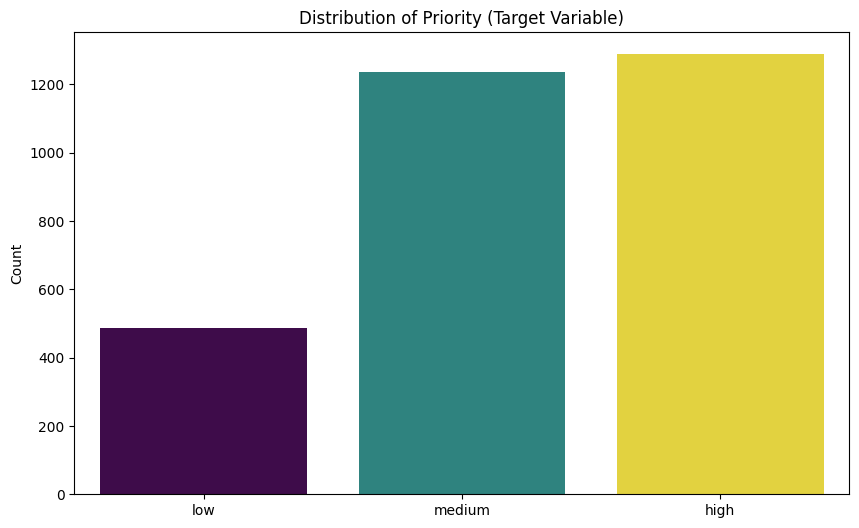

In [15]:
# Reading the dataset for queue classification.
df_priority_classification = pd.read_csv('drive/MyDrive/Colab Notebooks/data/priority_classification_numeric_dataset.csv')

# Priority labels for the bars
priority_labels = ['low', 'medium','high']

# Count the occurrences of each priority value
target_counts = df_priority_classification['priority'].value_counts()

# Plot a bar chart based on target count
plt.figure(figsize=(10,6))
ax = sns.barplot(x=target_counts.index, y=target_counts.values, hue=target_counts.index, palette='viridis', legend=False)

# Change the x-axis tick labels
ax.set_xticklabels(priority_labels)

# Add labels and title
plt.title('Distribution of Priority (Target Variable)')
plt.xlabel('')
plt.ylabel('Count')

# Display the plot
plt.show()

In [16]:
# Split features and target variable
X2 = df_priority_classification.drop('priority', axis=1)
y2 = df_priority_classification['priority']

# Checking the shape
X2.shape,y2.shape

((3011, 4505), (3011,))

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2408, 4505), (603, 4505), (2408,), (603,))

In [18]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_priority_resampled, y_train_priority_resampled = smote.fit_resample(X_train, y_train)

<ipython-input-19-3d7c59cf767e>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(priority_labels)


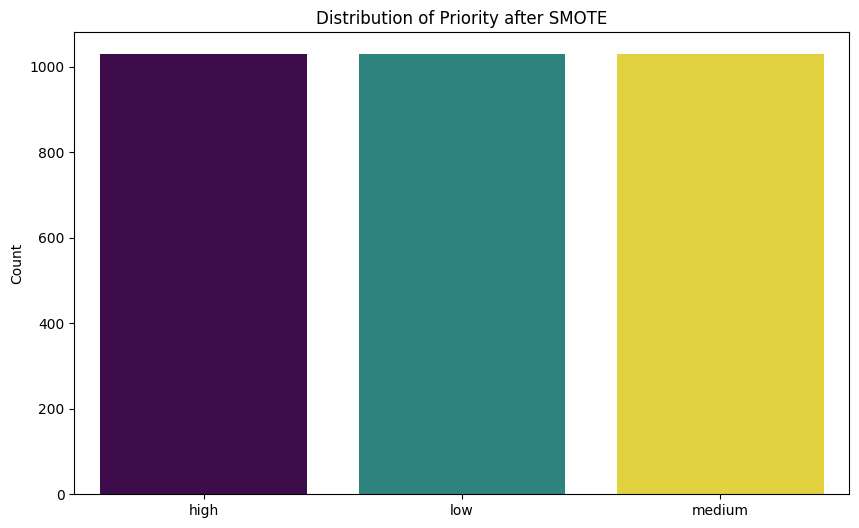

In [19]:
# Priority labels for the bars
priority_labels = ['high', 'low', 'medium']

# Plot a bar chart based on target count after SMOTE
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=y_train_priority_resampled,hue=y_train_priority_resampled, palette='viridis', legend=False)

# Change the x-axis tick labels
ax.set_xticklabels(priority_labels)

# Add labels and title
plt.title('Distribution of Priority after SMOTE')
plt.xlabel('')
plt.ylabel('Count')

# Display the plot
plt.show()

# Machine Learning Model Classification Section


**Importing Library for machine learning models**

In [124]:
# Importing libraries for machine learning models for training, testing and evaluation

# Importing Machine Learning Models Approach
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Importing Training and Testing Splits
from sklearn.model_selection import train_test_split

# Importing Evalutation Methods
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Importing Hyperparameter tuning for RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Hyperparamter Optimisation Functions

**Hyperparameter Tuning LinearSVC with RandomizedSearchCV**

In [105]:
def lsvc_hyper_tuning(X_train, y_train):

    # Defining Hyperparameters and values
    param_dist = {
      'C': [0.001, 0.01, 0.1, 1, 10],
      'tol': [1e-4, 1e-5, 1e-6],
      'max_iter': [2000, 3000, 5000]
    }

    # Defining model for RandomizedSearchCV
    model = LinearSVC()

    # Initialize RandomizedSearchCV for Linear SVC
    lsvc_random_search = RandomizedSearchCV(model, param_dist, n_iter=20, cv=5,
                                scoring='accuracy', random_state=42, n_jobs=-1, verbose=1)

    # Fit RandomizedSearchCV for Linear SVC
    lsvc_random_search.fit(X_train, y_train)

    # Print results for best parameters from RandomizedSearchCV
    print("Best parameters for Linear SVC:", lsvc_random_search.best_params_)

    # Return best hyperparameter value
    return lsvc_random_search.best_estimator_

**Hyperparameter Tuning Decision Tree with RandomizedSearchCV**



In [59]:
def dt_hyper_tuning(X_train, y_train):

    # Defining Hyperparameters and values
    param_dist = {
        'max_depth': [None, 5, 10, 20, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    }

    # Defining model for RandomizedSearchCV
    model = DecisionTreeClassifier(random_state=42)

    # Initialize RandomizedSearchCV for Decision Tree
    dt_random_search = RandomizedSearchCV(model, param_dist, n_iter=20, cv=5,
                                scoring='accuracy', random_state=42, n_jobs=-1, verbose=1)

    # Fit RandomizedSearchCV for Decision Tree
    dt_random_search.fit(X_train, y_train)

    # Print results for best parameters from RandomizedSearchCV
    print("Best parameters for Decision Tree:", dt_random_search.best_params_)

    # Return best hyperparameter value
    return dt_random_search.best_estimator_

**Hyperparameter Tuning K-Nearest Neighbors Classifier with RandomizedSearchCV**


In [71]:
def knn_hyper_tuning(X_train, y_train):

    # Defining Hyperparameters and values
    param_dist = {
        'n_neighbors': list(range(3, 20, 2)),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan'],
        'p': [1, 2]
    }

    # Defining model for RandomizedSearchCV
    model = KNeighborsClassifier()

    # Initialize RandomizedSearchCV for K-Nearest Neighbors Classifier
    knn_random_search = RandomizedSearchCV(model, param_dist, n_iter=20, cv=5,
                                scoring='accuracy', random_state=42, n_jobs=-1, verbose=1)

    # Fit RandomizedSearchCV for K-Nearest Neighbors Classifier
    knn_random_search.fit(X_train, y_train)

    # Print results for best parameters from RandomizedSearchCV
    print("Best parameters for KNN:", knn_random_search.best_params_)

    # Return best hyperparameter value
    return knn_random_search.best_estimator_

**Hyperparameter Tuning Random Forest Classifier with RandomizedSearchCV**


In [78]:
def rf_hyper_tuning(X_train, y_train):

    # Defining Hyperparameters and values
    param_dist = {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [None, 10, 20, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }

    # Defining model for RandomizedSearchCV
    model = RandomForestClassifier(random_state=42)

    # Initialize RandomizedSearchCV for Random Forest Classifer
    rf_random_search = RandomizedSearchCV(model, param_dist, n_iter=20, cv=5,
                                scoring='accuracy', random_state=42, n_jobs=-1, verbose=1)

    # Fit RandomizedSearchCV for Random Forest Classifer
    rf_random_search.fit(X_train, y_train)

    # Print results for best parameters from RandomizedSearchCV
    print("Best parameters for Random Forest:", rf_random_search.best_params_)

    # Return best hyperparameter value
    return rf_random_search.best_estimator_

**Hyperparameter Tuning Naive Bayes with RandomizedSearchCV**


In [73]:
def nb_hyper_tuning(X_train, y_train):

    # Defining Hyperparameters and values
    param_dist = {
        'var_smoothing': np.logspace(-12, -6, 50)
    }

    # Defining model for RandomizedSearchCV
    model = GaussianNB()

    # Initialize RandomizedSearchCV for Naive Bayes
    nb_random_search = RandomizedSearchCV(model, param_dist, n_iter=20, cv=5,
                                scoring='accuracy', random_state=42, n_jobs=-1, verbose=1)

    # Fit RandomizedSearchCV for Naive Bayes
    nb_random_search.fit(X_train, y_train)

    # Print results for best parameters from RandomizedSearchCV
    print("Best parameters for Naive Bayes:", nb_random_search.best_params_)

    # Return best hyperparameter value
    return nb_random_search.best_estimator_

# Cross Validation Report Function

In [119]:
def cross_validation_report(models, X_train, y_train):

  # Initialize Stratified K-Fold (preserving class distribution)
  kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  # Define multiple scoring metrics using macro
  scorers = {
      "Accuracy": "accuracy",
      "Precision": make_scorer(precision_score, average="macro"),
      "Recall": make_scorer(recall_score, average="macro"),
      "F1 Score": make_scorer(f1_score, average="macro")
  }

  # Empty list to store the results
  results = []

  # Iterate over each model and each scoring metric
  for model_name, model in models.items():
      for metric_name, scorer in scorers.items():
          # Evaluate model using cross-validation for the given metric
          scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=scorer)
          # Store mean and standard deviation of the scores
          results.append({
              "model": model_name,
              "metric": metric_name,
              "score": scores.mean(),
              "std_dev": scores.std()
          })

  # Creating the dataframe based on the results
  df_results = pd.DataFrame(results)

  # Returning dataframe
  return df_results

# Machine Learning Model - Queue Classification  

### Splitting the Data for Machine learning Implementation

**Splitting the data into training and test sets**

In [25]:
# Renaming resampled training features and labels for queue classification model
X_queue_resampled = X_train_queue_resampled
y_queue_resampled = y_train_queue_resampled

# Spliting the resampled data into training and test sets (80% train, 20% test)
X_queue_train, X_queue_test, y_queue_train, y_queue_test = train_test_split(X_queue_resampled, y_queue_resampled, test_size=0.2, random_state=42, stratify=y_queue_resampled)

# Check dimensions
print("Training Set for Queue Classification Size:", X_queue_train.shape)
print("Test Set for Queue Classification Size:", X_queue_test.shape)

Training Set for Queue Classification Size: (3736, 4505)
Test Set for Queue Classification Size: (934, 4505)


### Machine Learning Model - Classifying Queues with Linear SVC



In [26]:
# Initializing Linear SVC model
lsvc_model = LinearSVC()

# Train the Linear SVC model using the training data
lsvc_model.fit(X_queue_train, y_queue_train)

# Generate predictions on the test set using the trained Linear SVC model
y_queue_pred_lsvc = lsvc_model.predict(X_queue_test)

# Evaluate the performance of the Linear SVC model
print("Linear SVC Accuracy:", accuracy_score(y_queue_test, y_queue_pred_lsvc))
print("\nClassification Report:\n", classification_report(y_queue_test, y_queue_pred_lsvc))


Linear SVC Accuracy: 0.9014989293361885

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       187
           1       0.91      0.92      0.92       186
           2       0.87      0.95      0.91       187
           3       0.84      0.93      0.89       187
           4       0.90      0.72      0.80       187

    accuracy                           0.90       934
   macro avg       0.90      0.90      0.90       934
weighted avg       0.90      0.90      0.90       934



In [106]:
# Applying Hyperparameter optimisation
lsvc_hyper_tuning(X_queue_train, y_queue_train)

# Results : Best parameters for Linear SVC: {'tol': 0.0001, 'max_iter': 3000, 'C': 10}

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Linear SVC: {'tol': 0.0001, 'max_iter': 3000, 'C': 10}


LinearSVC(C=10, max_iter=3000)

### Machine Learning Model - Classifying Queues with Decision Tree Classifier

In [27]:
# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model using the training data
dt_model.fit(X_queue_train, y_queue_train)

# Generate predictions on the test set using the trained Decision Tree model
y_queue_pred_dt = dt_model.predict(X_queue_test)

# Evaluate the performance of the Decision Tree model
print("Decision Tree Accuracy:", accuracy_score(y_queue_test, y_queue_pred_dt))
print("\nClassification Report:\n", classification_report(y_queue_test, y_queue_pred_dt))

Decision Tree Accuracy: 0.7933618843683083

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       187
           1       0.76      0.74      0.75       186
           2       0.78      0.78      0.78       187
           3       0.74      0.76      0.75       187
           4       0.71      0.71      0.71       187

    accuracy                           0.79       934
   macro avg       0.79      0.79      0.79       934
weighted avg       0.79      0.79      0.79       934



In [75]:
# Applying Hyperparameter optimisation
dt_hyper_tuning(X_queue_train, y_queue_train)

# Result: Best parameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}


DecisionTreeClassifier(random_state=42)

### Machine Learning Model - Classifying Queues with K-Nearest Neighbors Classifier


In [37]:
# Initialize KNN model
knn_model = KNeighborsClassifier()

# Train the KNN model using the training data
knn_model.fit(X_queue_train, y_queue_train)

# Generate predictions on the test set using the trained KNN model
y_queue_pred_knn = knn_model.predict(X_queue_test)

# Evaluate the performance of the KNN model
print("KNN Accuracy:", accuracy_score(y_queue_test, y_queue_pred_knn))
print("\nClassification Report:\n", classification_report(y_queue_test, y_queue_pred_knn))


KNN Accuracy: 0.7387580299785867

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       187
           1       0.70      0.83      0.76       186
           2       0.61      0.91      0.73       187
           3       0.74      0.78      0.76       187
           4       0.78      0.17      0.28       187

    accuracy                           0.74       934
   macro avg       0.76      0.74      0.70       934
weighted avg       0.76      0.74      0.70       934



In [76]:
# Applying Hyperparameter optimisation
knn_hyper_tuning(X_queue_train, y_queue_train)

# Results: Best parameters for KNN: {'weights': 'distance', 'p': 2, 'n_neighbors': 3, 'metric': 'manhattan'}

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for KNN: {'weights': 'distance', 'p': 2, 'n_neighbors': 3, 'metric': 'manhattan'}


KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

### Machine Learning Model - Classifying Queues with Random Forest Classifier



In [29]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model using the training data
rf_model.fit(X_queue_train, y_queue_train)

# Generate predictions on the test set using the trained Random Forest model
y_queue_pred_rf = rf_model.predict(X_queue_test)

# Evaluate the performance of the Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_queue_test, y_queue_pred_rf))
print("\nClassification Report:\n", classification_report(y_queue_test, y_queue_pred_rf))


Random Forest Accuracy: 0.9325481798715204

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       187
           1       0.93      0.92      0.93       186
           2       0.98      0.92      0.95       187
           3       0.90      0.95      0.92       187
           4       0.87      0.88      0.87       187

    accuracy                           0.93       934
   macro avg       0.93      0.93      0.93       934
weighted avg       0.93      0.93      0.93       934



In [80]:
# Applying Hyperparameter optimisation
rf_hyper_tuning(X_queue_train, y_queue_train)

# Results: Best parameters for Random Forest:
# {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


RandomForestClassifier(max_features='log2', min_samples_split=5,
                       n_estimators=300, random_state=42)

### Machine Learning Model - Classifying Queues with Gaussian Naive Bayes


In [30]:
# Initialize Naive Bayes model
nb_model = GaussianNB()

# Train the Naive Bayes model using the training data
nb_model.fit(X_queue_train, y_queue_train)

# Generate predictions on the test set using the trained Naive Bayes model
y_queue_pred_nb = nb_model.predict(X_queue_test)

# Evaluate the performance of the Naive Bayes model
print("Naive Bayes Accuracy:", accuracy_score(y_queue_test, y_queue_pred_nb))
print("\nClassification Report:\n", classification_report(y_queue_test, y_queue_pred_nb))


Naïve Bayes Accuracy: 0.8447537473233405

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       187
           1       0.85      0.88      0.86       186
           2       0.74      0.97      0.84       187
           3       0.81      0.88      0.84       187
           4       0.88      0.52      0.65       187

    accuracy                           0.84       934
   macro avg       0.86      0.84      0.84       934
weighted avg       0.86      0.84      0.84       934



In [81]:
# Applying Hyperparameter optimisation
nb_hyper_tuning(X_queue_train, y_queue_train)

# Result: Best parameters for Naïve Bayes: {'var_smoothing': np.float64(7.543120063354607e-07)}

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Naïve Bayes: {'var_smoothing': np.float64(7.543120063354607e-07)}


GaussianNB(var_smoothing=np.float64(7.543120063354607e-07))

**Applying Cross Validation Report Fucntion to Compare Models**

In [123]:
# Defining the models with best hyperparameters for queue classification
models = {
    "Linear SVC": LinearSVC(tol=0.0001, max_iter=3000, C=10),
    "Decision Tree": DecisionTreeClassifier(random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=None, criterion='gini'),
    "KNN": KNeighborsClassifier(weights='distance', p=2, n_neighbors=3, metric='manhattan'),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features='log2', max_depth=None),
    "Naive Bayes": GaussianNB(var_smoothing=np.float64(7.543120063354607e-07))
}

# Calling cross_validation_report function on models and queue training data
cross_validation_queue_results = cross_validation_report(models, X_queue_train, y_queue_train)

# Storing the queue classification model cross-validation results as a variable
df_queue_classification_models_results = cross_validation_queue_results

# Saving dataframe as csv of queue classification model results
df_queue_classification_models_results.to_csv('drive/MyDrive/Colab Notebooks/data/df_queue_classification_models_results.csv', index=False)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Machine Learning Model - Priority Classification

**Splitting the data into training and test sets**


In [32]:
# Renaming resampled training features and labels for priority classification model
X_priority_resampled = X_train_priority_resampled
y_priority_resampled = y_train_priority_resampled

# Spliting the resampled data into training and test sets (80% train, 20% test)
X_priority_train, X_priority_test, y_priority_train, y_priority_test = train_test_split(X_priority_resampled, y_priority_resampled, test_size=0.2, random_state=42, stratify=y_priority_resampled)

# Check dimensions
print("Training Set for Priority Classification Size:", X_priority_train.shape)
print("Test Set for Priority Classification Size:", X_priority_test.shape)

Training Set for Priority Classification Size: (2469, 4505)
Test Set for Priority Classification Size: (618, 4505)


### Machine Learning Model - Classifying Priority with Linear SVC

In [33]:
# Initializing Linear SVC model
lsvc_model = LinearSVC()

# Train the Linear SVC model using the training data
lsvc_model.fit(X_priority_train, y_priority_train)

# Generate predictions on the test set using the trained Linear SVC model
y_priority_pred_lsvc = lsvc_model.predict(X_priority_test)

# Evaluate the performance of the Linear SVC model
print("Linear SVC Accuracy:", accuracy_score(y_priority_test, y_priority_pred_lsvc))
print("\nClassification Report:\n", classification_report(y_priority_test, y_priority_pred_lsvc))

Linear SVC Accuracy: 0.8268608414239482

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       206
           1       0.78      0.75      0.76       206
           2       0.83      0.78      0.80       206

    accuracy                           0.83       618
   macro avg       0.83      0.83      0.82       618
weighted avg       0.83      0.83      0.82       618



In [103]:
# Applying Hyperparameter optimisation
lsvc_hyper_tuning(X_priority_train, y_priority_train)

# Results: Best parameters for Linear SVC: {'tol': 1e-05, 'max_iter': 2000, 'C': 1}

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Linear SVC: {'tol': 1e-05, 'max_iter': 2000, 'C': 1}


LinearSVC(C=1, max_iter=2000, tol=1e-05)

### Machine Learning Model - Classifying Priority with Decision Tree Classifier

In [34]:
# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model using the training data
dt_model.fit(X_priority_train, y_priority_train)

# Generate predictions on the test set using the trained Decision Tree model
y_priority_pred_dt = dt_model.predict(X_priority_test)

# Evaluate the performance of the Decision Tree model
print("Decision Tree Accuracy:", accuracy_score(y_priority_test, y_priority_pred_dt))
print("\nClassification Report:\n", classification_report(y_priority_test, y_priority_pred_dt))

Decision Tree Accuracy: 0.7184466019417476

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       206
           1       0.64      0.66      0.65       206
           2       0.73      0.67      0.70       206

    accuracy                           0.72       618
   macro avg       0.72      0.72      0.72       618
weighted avg       0.72      0.72      0.72       618



In [83]:
# Applying Hyperparameter optimisation
dt_hyper_tuning(X_priority_train, y_priority_train)

# Result: Best parameters for Decision Tree:
# {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}


DecisionTreeClassifier(random_state=42)

### Machine Learning Model - Classifying Priority with K-Nearest Neighbors Classifier


In [36]:
# Initialize KNN model
knn_model = KNeighborsClassifier()

# Train the KNN model using the training data
knn_model.fit(X_priority_train, y_priority_train)

# Generate predictions on the test set using the trained KNN model
y_priority_pred_knn = knn_model.predict(X_priority_test)

# Evaluate the performance of the KNN model
print("KNN Accuracy:", accuracy_score(y_priority_test, y_priority_pred_knn))
print("\nClassification Report:\n", classification_report(y_priority_test, y_priority_pred_knn))


KNN Accuracy: 0.587378640776699

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.96      0.67       206
           1       0.61      0.31      0.41       206
           2       0.77      0.50      0.61       206

    accuracy                           0.59       618
   macro avg       0.63      0.59      0.56       618
weighted avg       0.63      0.59      0.56       618



In [84]:
# Applying Hyperparameter optimisation
knn_hyper_tuning(X_priority_train, y_priority_train)

# Results: Best parameters for KNN: {'weights': 'distance', 'p': 2, 'n_neighbors': 3, 'metric': 'manhattan'}

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for KNN: {'weights': 'distance', 'p': 2, 'n_neighbors': 3, 'metric': 'manhattan'}


KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

### Machine Learning Model - Classifying Priority with Random Forest Classifier


In [39]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model using the training data
rf_model.fit(X_priority_train, y_priority_train)

# Generate predictions on the test set using the trained Random Forest model
y_priority_pred_rf = rf_model.predict(X_priority_test)

# Evaluate the performance of the Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_priority_test, y_priority_pred_rf))
print("\nClassification Report:\n", classification_report(y_priority_test, y_priority_pred_rf))

Random Forest Accuracy: 0.8495145631067961

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       206
           1       0.79      0.77      0.78       206
           2       0.84      0.83      0.84       206

    accuracy                           0.85       618
   macro avg       0.85      0.85      0.85       618
weighted avg       0.85      0.85      0.85       618



In [85]:
# Applying Hyperparameter optimisation
rf_hyper_tuning(X_priority_train, y_priority_train)

# Best parameters for Random Forest:
# {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


RandomForestClassifier(max_features='log2', min_samples_split=5,
                       n_estimators=300, random_state=42)

### Machine Learning Model - Classifying Priority with Gaussian Naive Bayes


In [40]:
# Initialize Naive Bayes model
nb_model = GaussianNB()

# Train the Naive Bayes model using the training data
nb_model.fit(X_priority_train, y_priority_train)

# Generate predictions on the test set using the trained Naive Bayes model
y_priority_pred_nb = nb_model.predict(X_priority_test)

# Evaluate the performance of the Naive Bayes model
print("Naive Bayes Accuracy:", accuracy_score(y_priority_test, y_priority_pred_nb))
print("\nClassification Report:\n", classification_report(y_priority_test, y_priority_pred_nb))

Naïve Bayes Accuracy: 0.7524271844660194

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.99      0.84       206
           1       0.76      0.61      0.68       206
           2       0.79      0.66      0.72       206

    accuracy                           0.75       618
   macro avg       0.76      0.75      0.74       618
weighted avg       0.76      0.75      0.74       618



In [ ]:
# Applying Hyperparameter optimisation
nb_hyper_tuning(X_priority_train, y_priority_train)

# Result Best parameters for Naïve Bayes: {'var_smoothing': np.float64(7.543120063354607e-07)}

### Cross Validation Report for Priority Classification Model

**Applying Cross Validation Report Fucntion**

In [127]:
# Defining the models with best hyperparameters for priority classification
models = {
    "Linear SVC": LinearSVC(tol=1e-05, max_iter=2000, C=1),
    "Decision Tree": DecisionTreeClassifier(random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=None, criterion='gini'),
    "KNN": KNeighborsClassifier(weights='distance', p=2, n_neighbors=3, metric='manhattan'),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features='log2', max_depth=None),
    "Naive Bayes": GaussianNB(var_smoothing=np.float64(7.543120063354607e-07))
}

# Calling cross_validation_report function on models and priority training data
cross_validation_priority_results = cross_validation_report(models,X_priority_train, y_priority_train)

# Storing the priority classification model cross-validation results as a variable
df_priority_classification_models_results = cross_validation_priority_results

# Saving dataframe as csv of priority classification model results
df_priority_classification_models_results.to_csv('drive/MyDrive/Colab Notebooks/data/df_priority_classification_models_results.csv', index=False)